# Tester: Nonlinear Langevin
## Double-welled overdamped Langevin (DWOL)

### Simple double well $V(x) = 1/4(x^2-1)^2$

Here we take for out potential the function $$V(x) = 1/4(x^2-1)^2$$ and so the (overdamped, stochastic) Langenvin equation is $$dX_t = -V'(X_t)dt + \sigma dW_t = -X_t(X_t^2-1) + \sigma dW_t$$
We solve this numerically in various ways to get an approximate solution if to the equation. For instance we will often use Euler-Maruyama which soluction takes the form 
$$Y_{n+1} = Y_{n} + \Delta t\big(-Y_n(Y_n^2-1)\big) + \sigma \sqrt{\Delta t}v_n$$
where $Y_n \approx X_{\Delta t n}$ and $v_n \sim N(0,1)$ for all $n = 0,1,2,\dots$ are i.i.d.

The goal here is to reproduce the statisical and dynamical information (?). Of a realization of $Y = (Y_n;\;n=o,1,2,\dots)$ using a reduced model. We will compare the autocavariances as well as the pdf the $Y_n$. 

So, first we run the full model. To do this I use the function `DataGen_DWOL` found in th file `DataGen.jl` found in the current folder (`Examples\Nonlinear Langevin`).

In [15]:
using PyPlot
using Random
using JLD

# Get software to generate model
include("../Nonlinear Langevin/DataGen.jl")

# Get model reduction software being tested
include("../../Tools/Model_Reduction_Dev.jl")

# Get tester tools
include("testertools.jl")

causal_test (generic function with 1 method)

In [2]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [.5]
V_prime = x -> -x.*(x.^2 .- 1)
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2014)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

1×10000001 Array{Float64,2}:
 1.21912  1.2862  1.30297  1.2873  …  1.17377  1.23803  1.20563  1.23796

In [3]:
data = Dict("steps" => steps,
            "t_start" => t_start,
            "sigma" => sigma,
            "X" => X)
save("data_10_23_2020.jld",data)

In [4]:
data = load("data_10_23_2020.jld")
X = data["X"]

1×10000001 Array{Float64,2}:
 1.21912  1.2862  1.30297  1.2873  …  1.17377  1.23803  1.20563  1.23796

In [5]:
X = data["X"]

1×10000001 Array{Float64,2}:
 1.21912  1.2862  1.30297  1.2873  …  1.17377  1.23803  1.20563  1.23796

In [6]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 55
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm

Number of CKMS iterations: 229
errK errR : 5.839641943327172e-11 1.7393616235168657e-14
 37.282013 seconds (69.88 M allocations: 16.103 GiB, 4.80% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.00976-2.37045e-14im  -0.00979518+6.17976e-15im

[:, :, 2] =
 -0.000758073-6.48571e-14im  0.000299071+1.79632e-14im

[:, :, 3] =
 0.00112176+1.79866e-13im  -0.000601638-4.81259e-14im

...

[:, :, 98] =
 1.67209e-6+5.18674e-15im  -4.14287e-7-1.36712e-15im

[:, :, 99] =
 7.50158e-7+3.78704e-15im  -1.87947e-7-1.02287e-15im

[:, :, 100] =
 -6.57134e-7-2.11936e-15im  1.58132e-7+5.93994e-16im

In [7]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 10000
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pack_dm = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm                              = h_pack_dm[1][1]

Number of CKMS iterations: 6801
errK errR : 7.188946213993904e-11 4.083057817338725e-14
 55.679377 seconds (34.48 M allocations: 57.836 GiB, 7.31% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.00971-5.32819e-14im  -0.00979209+1.37593e-14im

[:, :, 2] =
 -0.000778425-3.73527e-14im  0.000310248+9.93868e-15im

[:, :, 3] =
 0.00129579+1.86277e-13im  -0.000654304-4.855e-14im

...

[:, :, 98] =
 0.000301709+2.75668e-14im  0.000165411-8.99039e-15im

[:, :, 99] =
 -0.00063169-6.99755e-14im  4.09588e-5+2.44177e-14im

[:, :, 100] =
 0.000651138+6.83059e-14im  -0.000223626-2.20093e-14im

In [8]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
n = 3
p = 500
ty = "bin"

xspec_est = "SP"

nfft = 0

@time h_pack_sp = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_sp                              = h_pack_sp[1][1][1,:,1]

Number of CKMS iterations: 6801
errK errR : 7.188946213993904e-11 4.083057817338725e-14
102.830857 seconds (594.01 M allocations: 87.953 GiB, 10.06% gc time)


2-element Array{Complex{Float64},1}:
    1.011961892599562 + 6.73071123280616e-15im
 -0.01045459060348742 - 1.943334695292819e-15im

In [9]:
h_wf_dm                              = h_pack_dm[1][1]
z_spect_pred_minus_num_fft_dm        = h_pack_dm[1][4]
z_spect_pred_plus_num_fft_dm         = h_pack_dm[1][5]
S_sigpred_overS_plus_fft_num_dm      = h_pack_dm[1][6]
S_sigpred_overS_plus_plus_num_fft_dm = h_pack_dm[1][7]
H_num_dm                             = h_pack_dm[1][8];

h_wf_sp                              = h_pack_sp[1][1]
z_spect_pred_minus_num_fft_sp        = h_pack_sp[1][4]
z_spect_pred_plus_num_fft_sp         = h_pack_sp[1][5]
S_sigpred_overS_plus_fft_num_sp      = h_pack_sp[1][6]
S_sigpred_overS_plus_plus_num_fft_sp = h_pack_sp[1][7]
H_num_sp                             = h_pack_sp[1][8];

nfft_sp = size(H_num_sp,3)
nfft_dm = size(H_num_dm,3)
T_sp = 2π*(0:nfft_sp-1)/nfft_sp
T_dm = 2π*(0:nfft_dm-1)/nfft_dm

0.0:9.587379924285257e-5:6.2830894333803435

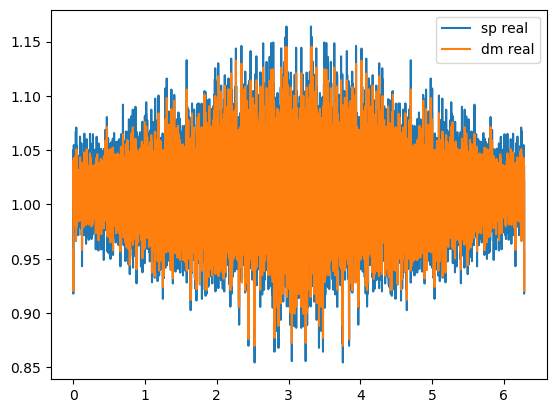

PyObject <matplotlib.legend.Legend object at 0x00000000018E2F88>

In [10]:
plot(T_sp[1:100:end],real(H_num_sp[1,1,1:100:end]'),label = "sp real")
plot(T_dm,real(H_num_dm[1,1,:]'),label = "dm real")
legend()

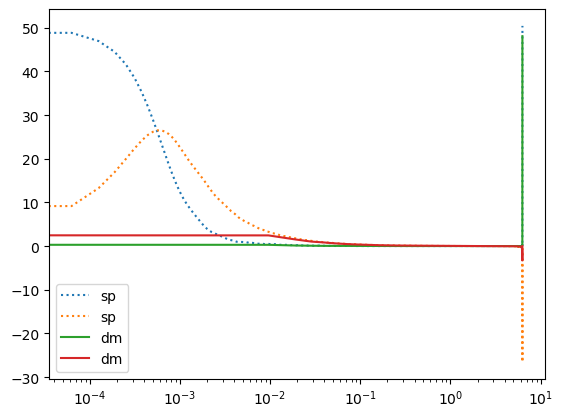

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x0000000001EDA648>

In [11]:
semilogx(T_sp[1:100:end],
    reverse([real(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                    1:100:end])],dims = 1),
    ":",
    label = "sp")
semilogx(T_dm[1:100:end],
    reverse([real(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                    1:100:end])],dims = 1),
    label = "dm")
legend()

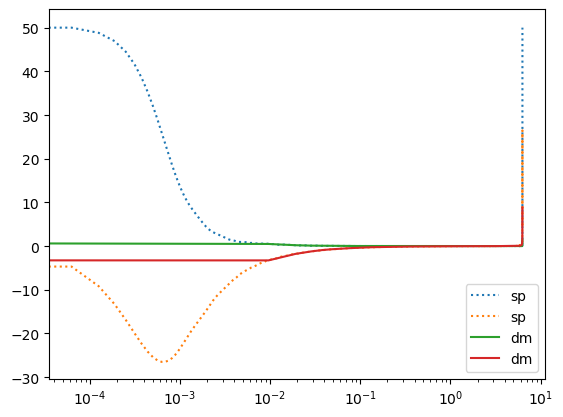

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000004ACABC88>

In [12]:
semilogx(T_sp[1:100:end],
    [real(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_sp[1,1,
                    1:100:end])],
    ":",
    label = "sp")
semilogx(T_dm[1:100:end],
    [real(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                1:100:end]) imag(S_sigpred_overS_plus_plus_num_fft_dm[1,1,
                    1:100:end])],
    label = "dm")
legend()

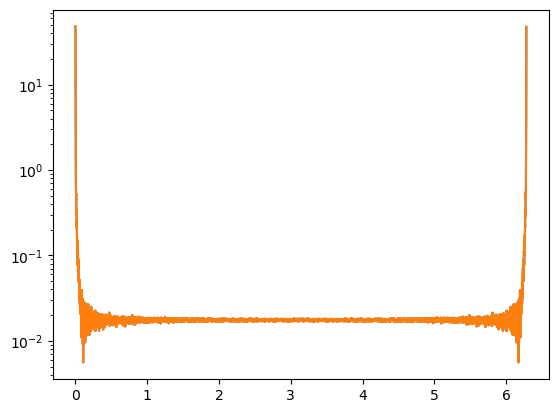

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000627232C8>

In [13]:
semilogy(T_dm,z_spect_pred_minus_num_fft_dm[1,1,:])
semilogy(T_sp[1:100:end],z_spect_pred_minus_num_fft_sp[1,1,1:100:end])

### Shifted Double Well


$V(x) = 1/4((x-2)^2 - 1)$

In [9]:
V_prime = x -> -(x.^3 - 6x.^2 + 11 .*x .- 6)

V_prime([1 2 3])

1×3 Array{Int64,2}:
 0  0  0

In [10]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [.5]
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2016)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

1×10000001 Array{Float64,2}:
 3.09368  2.99808  3.01524  3.01428  …  1.36308  1.3479  1.31585  1.33509

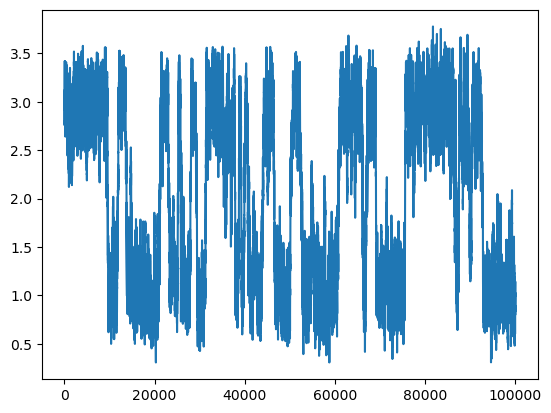

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002325790>

In [11]:
plot(X[1,1:100000])

In [12]:
m = mean(X[:])

X_c = X .- m

1×10000001 Array{Float64,2}:
 1.10815  1.01255  1.02971  1.02875  …  -0.637629  -0.669677  -0.650443

In [16]:
# Put in Psi functions
Psi(x) = [x; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 5000
ty = "bin"
xspec_est = "DM"
rl = false
Preds = true
PI = false
rtol = 1e-6

nfft = 2^16

@time h_wf_dm, pred = get_wf(X_c, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm

Number of CKMS iterations: 3413
errK errR : 7.554453196875042e-11 7.544391576149468e-14
 35.586105 seconds (35.76 M allocations: 25.303 GiB, 6.16% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 1.00956-5.56743e-14im  -0.00994531+1.27243e-14im

[:, :, 2] =
 -0.00118869+3.05673e-14im  0.000302674-7.18905e-15im

[:, :, 3] =
 0.00115498+9.81969e-14im  -0.000264263-2.3803e-14im

...

[:, :, 98] =
 -0.000465677+6.88912e-14im  0.000129879-2.17026e-14im

[:, :, 99] =
 -0.000223978+3.04717e-15im  -6.80016e-5+1.24388e-15im

[:, :, 100] =
 0.000467621-1.44458e-13im  9.82628e-5+4.09712e-14im

In [17]:
@time h_wf_dm, pred = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm

Number of CKMS iterations: 4208
errK errR : 9.887100165797774e-11 3.3187619752067856e-13
 35.977838 seconds (33.66 M allocations: 27.427 GiB, 5.47% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 0.992596-3.6732e-14im  -0.000194109+1.03398e-15im

[:, :, 2] =
 -0.00138186+2.64061e-14im  8.03456e-5-1.27017e-15im

[:, :, 3] =
 0.00153478+8.45348e-14im  -6.13441e-5-2.75398e-15im

...

[:, :, 98] =
 -0.000463844+3.75317e-14im  2.45595e-5-5.26686e-16im

[:, :, 99] =
 -0.000581708+1.19556e-14im  1.49097e-5-4.93142e-16im

[:, :, 100] =
 0.000917113-7.48561e-14im  -1.17412e-5+2.46282e-15im

### Uneven Double well

$V(x) = \frac{1}{10}x(x+1)(x-4)^2$

$V'(x) = \frac{1}{10}(4x^3 - 21x^2 + 16x + 16)$

The left well is a little low then the right.

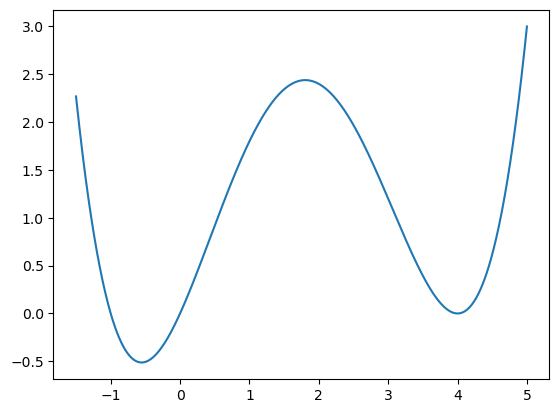

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002361790>

In [26]:
V       = x ->  1/10*x*(x+1)*(x-4)^2
V_prime = x -> -(4x.^3 - 21x.^2 + 16x .+ 16)/10

xx = -1.5:0.01:5
plot(xx,V.(xx))

In [27]:
# Model run Parameters
steps = 10^7 + 1
scheme = "FE"
t_start = 0
t_stop = 10^5
discard = 100000
sig_init = [1.5]
sigma = [2]
SM1 = false
Obs_noise = false
d = 1
# e = randn(d,steps + discard)

dt = (t_stop - t_start)/(steps - 1)

# Get full model run
Random.seed!(2018)
X = DataGen_DWOL(
    steps;
    scheme, t_start, t_stop, discard, 
    sig_init , sigma, V_prime,
    SM1, Obs_noise, d
    )

1×10000001 Array{Float64,2}:
 3.53097  3.76596  3.54371  3.79429  …  -0.66387  -0.672487  -0.575031

In [28]:
### This is how we set up the signals and 
### predictors They have to me off set so 
### that pred is one index behind signal
### i.e. pre(n) = psi(sig(n-1))
X_sig = X[:,2:end];

Psi(x) = [x; x.^2; x.^3]
X_pred = get_pred(X,Psi) # Notice it is just 
                         # X get_pred assigns
                         # psi straight across

3×10000001 Array{Float64,2}:
  3.53097   3.76596   3.54371   3.79429  …  -0.66387   -0.672487  -0.575031
 12.4677   14.1825   12.5579   14.3966       0.440724   0.452239   0.33066
 44.0231   53.4107   44.5017   54.6249      -0.292583  -0.304125  -0.19014

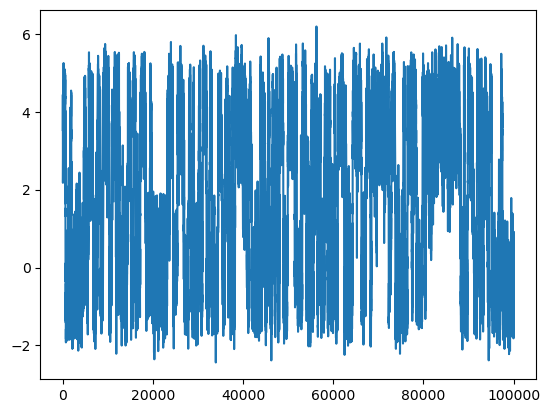

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003A9E16D0>

In [29]:
plot(X[1,1:100000])

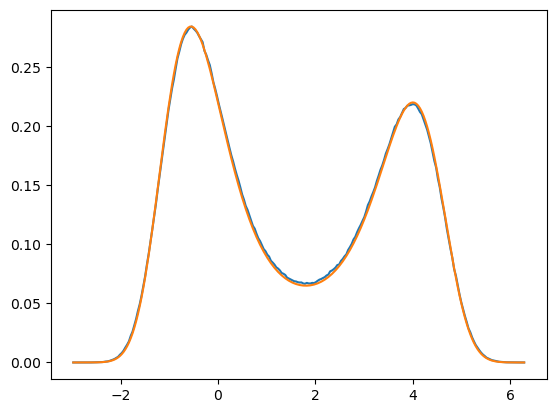

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003AA3A6D0>

In [30]:
σ = sigma[1]
O = emp_pdf(X[1,:])
p_ana(x) = exp(-V(x)*2/σ^2)
α = maximum(O[1])/p_ana(-0.554)
plot(O[2],p_ana.(O[2])*α)

In [31]:
m = mean(X[:])

1.5086913695581312

In [32]:
# ## Redone model with centered wells
# V_c       = x -> V(x .+ m)
# V_c_prime = x -> V_prime(x .+ m)

# # rerun centered model to check
# Random.seed!(2014)
# X_c = DataGen_DWOL(
#     steps;
#     scheme, t_start, t_stop, discard, 
#     sig_init , sigma, V_prime = V_c_prime,
#     SM1, Obs_noise, d
#     )

# m_c = mean(X_c[:])

X_c = X .- m

1×10000001 Array{Float64,2}:
 2.02228  2.25727  2.03502  2.2856  2.28677  …  -2.17256  -2.18118  -2.08372

In [33]:
# Put in Psi functions
Psi(x) = [x; x.^2; x.^3]

# Model reduction Parameters
M_out = 100
n = 3
p = 500
par = 55
ty = "bin"
xspec_est = "DM"
rl = false
Preds = false
PI = false
rtol = 1e-6

nfft = 2^16

@time h_pwf_dm = get_wf(X_c, Psi;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_dm


Number of CKMS iterations: 225
errK errR : 9.615384420112286e-11 1.08569807547072e-13
 51.664914 seconds (42.96 M allocations: 26.412 GiB, 3.66% gc time)


1×2×100 Array{Complex{Float64},3}:
[:, :, 1] =
 0.992596-3.6732e-14im  -0.000194109+1.03398e-15im

[:, :, 2] =
 -0.00138186+2.64061e-14im  8.03456e-5-1.27017e-15im

[:, :, 3] =
 0.00153478+8.45348e-14im  -6.13441e-5-2.75398e-15im

...

[:, :, 98] =
 -0.000463844+3.75317e-14im  2.45595e-5-5.26686e-16im

[:, :, 99] =
 -0.000581708+1.19556e-14im  1.49097e-5-4.93142e-16im

[:, :, 100] =
 0.000917113-7.48561e-14im  -1.17412e-5+2.46282e-15im

Analytic solution:

In [34]:
h_ana = [1-dt*(6m^2/5-21m/5+8/5) -dt*(6m/5-21/10) -dt*2/5]

1×3 Array{Float64,2}:
 1.02005  0.0028957  -0.004

## Analyze Wiener Filter

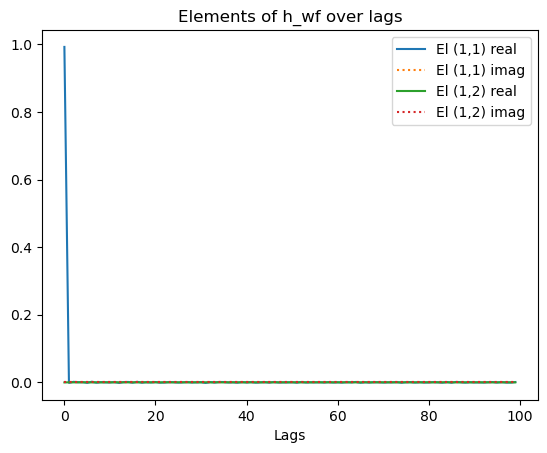

PyObject Text(0.5, 1.0, 'Elements of h_wf over lags')

In [35]:
plot_WF(h_wf_dm, rl = false)

## Analyze One step prediction error

In [36]:
### This is how we set up the signals and 
### predictors They have to me off set so 
### that pred is one index behind signal
### i.e. pre(n) = psi(sig(n-1))
X_c_sig = X_c[:,2:end];

Psi(x) = [x; x.^2; x.^3]
X_c_pred = get_pred(X_c,Psi) # Notice it is just 
                         # X get_pred assigns
                         # psi straight across




X_c_hat = one_step_pred(X_c_sig, h_wf_dm, X_c_pred)

LoadError: DimensionMismatch("second dimension of A, 2, does not match length of x, 3")

In [37]:
wind = (1:100) .+ 2400
plot([X_c_sig[1,wind] X_c_hat[1,wind.+1]])

LoadError: UndefVarError: X_c_hat not defined

In [38]:
X_c_err = X_c_sig - X_c_hat

LoadError: UndefVarError: X_c_hat not defined

In [39]:
lags = -100:100
C1 = my_crosscov(X_c_pred[1,1:end-1],X_c_err[:],lags);
C2 = my_crosscov(X_c_pred[2,1:end-1],X_c_err[:],lags);
C3 = my_crosscov(X_c_pred[3,1:end-1],X_c_err[:],lags);

plot(dt*lags,[C1 C2 C3])

LoadError: UndefVarError: X_c_err not defined

## Analyze Reduced Model Run

In [40]:
X_rm = redmodrun(X, h_wf, Psi)


LoadError: UndefVarError: h_wf not defined

# Trick (model mismatch)

In [41]:
X = X_c

n = 3
p = 500
ty = "bin"

xspec_est = "SP"

# Put in Psi functions
Psi_cos(x) = [x; cos.(x)]
@time h_wf_cos = get_wf(X, Psi_cos;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol);

h_wf_cos[1,:,1]

Number of CKMS iterations: 167
errK errR : 9.374791703147495e-11 9.052200030230077e-14
 20.559202 seconds (36.46 M allocations: 11.167 GiB, 4.68% gc time)


2-element Array{Complex{Float64},1}:
   1.4200064920438717 + 3.7886651260760325e-15im
 -0.28203121856677527 - 2.2236580681601625e-15im

In [42]:
Psi_sin(x) = [x; sin.(x)]
@time h_wf_sin = get_wf(X, Psi_sin;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol)[1][1];

h_wf_sin[1,:,1]

Number of CKMS iterations: 159
errK errR : 9.977222842607679e-11 2.5189595213880066e-14
 19.955148 seconds (34.08 M allocations: 11.051 GiB, 5.20% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [43]:
Psi_exp(x) = [x; exp.(x); exp.(-x)]
@time h_wf_exp = get_wf(X, Psi_exp;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol)[1][1];

h_wf_exp[1,:,1]

Number of CKMS iterations: 210
errK errR : 9.744573901695542e-11 1.6730529367908863e-13
 42.295422 seconds (54.60 M allocations: 22.480 GiB, 4.38% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [44]:
Psi_expi(x) = [x; exp.(im*x); exp.(-im*x)]
@time h_wf_expi = get_wf(X, Psi_expi;
    M_out, n, p, par, ty, nfft, rl = false, xspec_est, Preds, PI, rtol)[1][1];

h_wf_expi[1,:,1]

Number of CKMS iterations: 182
errK errR : 5.837730128787683e-11 1.0405275456426972e-13
 43.509330 seconds (65.41 M allocations: 23.560 GiB, 5.06% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [45]:
fun(x) = h_ana*Psi(x)
fun_c(x) = h_wf_dm[:,:,1]*Psi(x)
fun_cos(x) = h_wf_cos[:,:,1]*Psi_cos(x)
fun_sin(x) = h_wf_sin[:,:,1]*Psi_sin(x)
fun_exp(x) = h_wf_exp[:,:,1]*Psi_exp(x)
fun_expi(x) = h_wf_expi[:,:,1]*Psi_expi(x)

fun_expi (generic function with 1 method)

In [46]:
xx = -5:0.01:5
plot(xx,fun.(xx),label = "analytic")
plot(xx,fun_c.(xx),label = "cube")
plot(xx,fun_cos.(xx),label = "cos")
plot(xx,fun_sin.(xx),label = "sin")
plot(xx,fun_exp.(xx),label = "exp")
plot(xx,real(fun_expi.(xx)),label = "expi real")
plot(xx,imag(fun_expi.(xx)),label = "expi imag")
println(h_wf_dm[:,:,1])
println(h_wf_cos[:,:,1])
println(h_wf_sin[:,:,1])
println(h_wf_exp[:,:,1])
println(h_wf_expi[:,:,1])
legend()

LoadError: DimensionMismatch("second dimension of A, 2, does not match length of x, 3")

In [47]:
X = X_c

n = 3
p = 500
ty = "bin"

xspec_est = "DM"

# Put in Psi functions
Psi_cos(x) = [x; cos.(x)]
@time h_wf_cos = get_wf(X, Psi_cos;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol)[1][1];

h_wf_cos[1,:,1]

Number of CKMS iterations: 167
errK errR : 9.374791703147495e-11 9.052200030230077e-14
 27.714440 seconds (32.91 M allocations: 14.266 GiB, 4.35% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [48]:
Psi_sin(x) = [x; sin.(x)]
@time h_wf_sin = get_wf(X, Psi_sin;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol)[1][1];

h_wf_sin[1,:,1]

Number of CKMS iterations: 159
errK errR : 9.977222842607679e-11 2.5189595213880066e-14
 27.686203 seconds (32.91 M allocations: 14.265 GiB, 4.56% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [49]:
Psi_exp(x) = [x; exp.(x); exp.(-x)]
@time h_wf_exp = get_wf(X, Psi_exp;
    M_out, n, p, par, ty, nfft, rl, xspec_est, Preds, PI, rtol)[1][1];

h_wf_exp[1,:,1]

Number of CKMS iterations: 210
errK errR : 9.744573901695542e-11 1.6730529367908863e-13
 53.681271 seconds (52.95 M allocations: 27.304 GiB, 4.23% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [50]:
Psi_expi(x) = [x; exp.(im*x); exp.(-im*x)]
@time h_wf_expi = get_wf(X, Psi_expi;
    M_out, n, p, par, ty, nfft, rl = false, xspec_est, Preds, PI, rtol)[1][1];

h_wf_expi[1,:,1]

Number of CKMS iterations: 182
errK errR : 5.837730128787683e-11 1.0405275456426972e-13
 55.257942 seconds (62.97 M allocations: 28.347 GiB, 4.24% gc time)


LoadError: MethodError: no method matching getindex(::Complex{Float64}, ::Int64, ::Colon, ::Int64)
Closest candidates are:
  getindex(::Number, !Matched::Integer...) at number.jl:81
  getindex(::Number, ::Integer) at number.jl:76
  getindex(::Number) at number.jl:75
  ...

In [51]:
fun(x) = h_ana*Psi(x)
fun_c(x) = h_wf_dm[:,:,1]*Psi(x)
fun_cos(x) = h_wf_cos[:,:,1]*Psi_cos(x)
fun_sin(x) = h_wf_sin[:,:,1]*Psi_sin(x)
fun_exp(x) = h_wf_exp[:,:,1]*Psi_exp(x)
fun_expi(x) = h_wf_expi[:,:,1]*Psi_expi(x)

fun_expi (generic function with 1 method)

In [52]:
xx = -5:0.01:5
plot(xx,fun.(xx),label = "analytic")
plot(xx,fun_c.(xx),label = "cube")
plot(xx,fun_cos.(xx),label = "cos")
plot(xx,fun_sin.(xx),label = "sin")
plot(xx,fun_exp.(xx),label = "exp")
plot(xx,real(fun_expi.(xx)),label = "expi real")
plot(xx,imag(fun_expi.(xx)),label = "expi imag")
println(h_wf_dm[:,:,1])
println(h_wf_cos[:,:,1])
println(h_wf_sin[:,:,1])
println(h_wf_exp[:,:,1])
println(h_wf_expi[:,:,1])
legend()

LoadError: DimensionMismatch("second dimension of A, 2, does not match length of x, 3")